# Bivariate & Multivariate Analysis

This notebook analyzes relationships between **student attributes** and
the **placement outcome**.

### Objectives:
- Identify factors associated with placement
- Compare placed vs non-placed groups
- Avoid causal claims; focus on observed patterns
- Support insights with visual evidence

The cleaned dataset from Notebook 02 is used.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [39]:
df = pd.read_csv("../data/placement_cleaned.csv")


In [40]:
VISUALS_DIR = "../visuals"
os.makedirs(VISUALS_DIR, exist_ok=True)

def save_plot(filename):
    plt.savefig(os.path.join(VISUALS_DIR, filename),
                bbox_inches="tight",
                dpi=120)
    plt.show()


## Placement Outcome vs Gender

We compare placement rates across genders to identify
any visible imbalance in outcomes.


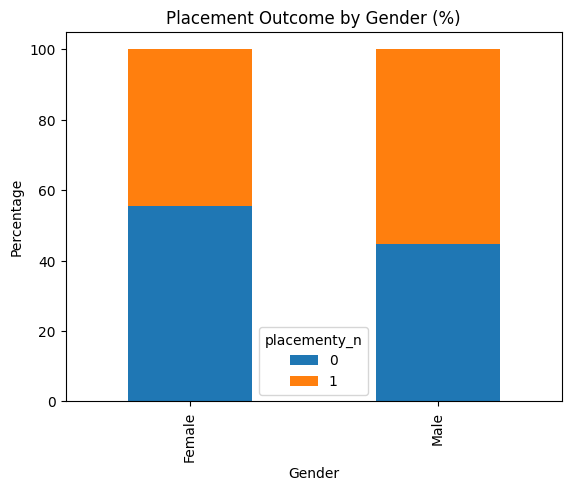

In [41]:
gender_placement = pd.crosstab(df["gender"], df["placementy_n"], normalize="index") * 100
gender_placement.plot(kind="bar", stacked=True)

plt.title("Placement Outcome by Gender (%)")
plt.xlabel("Gender")
plt.ylabel("Percentage")

save_plot("placement_vs_gender.png")


## Placement Outcome vs Academic Stream

This analysis highlights how placement outcomes vary
across different academic streams.


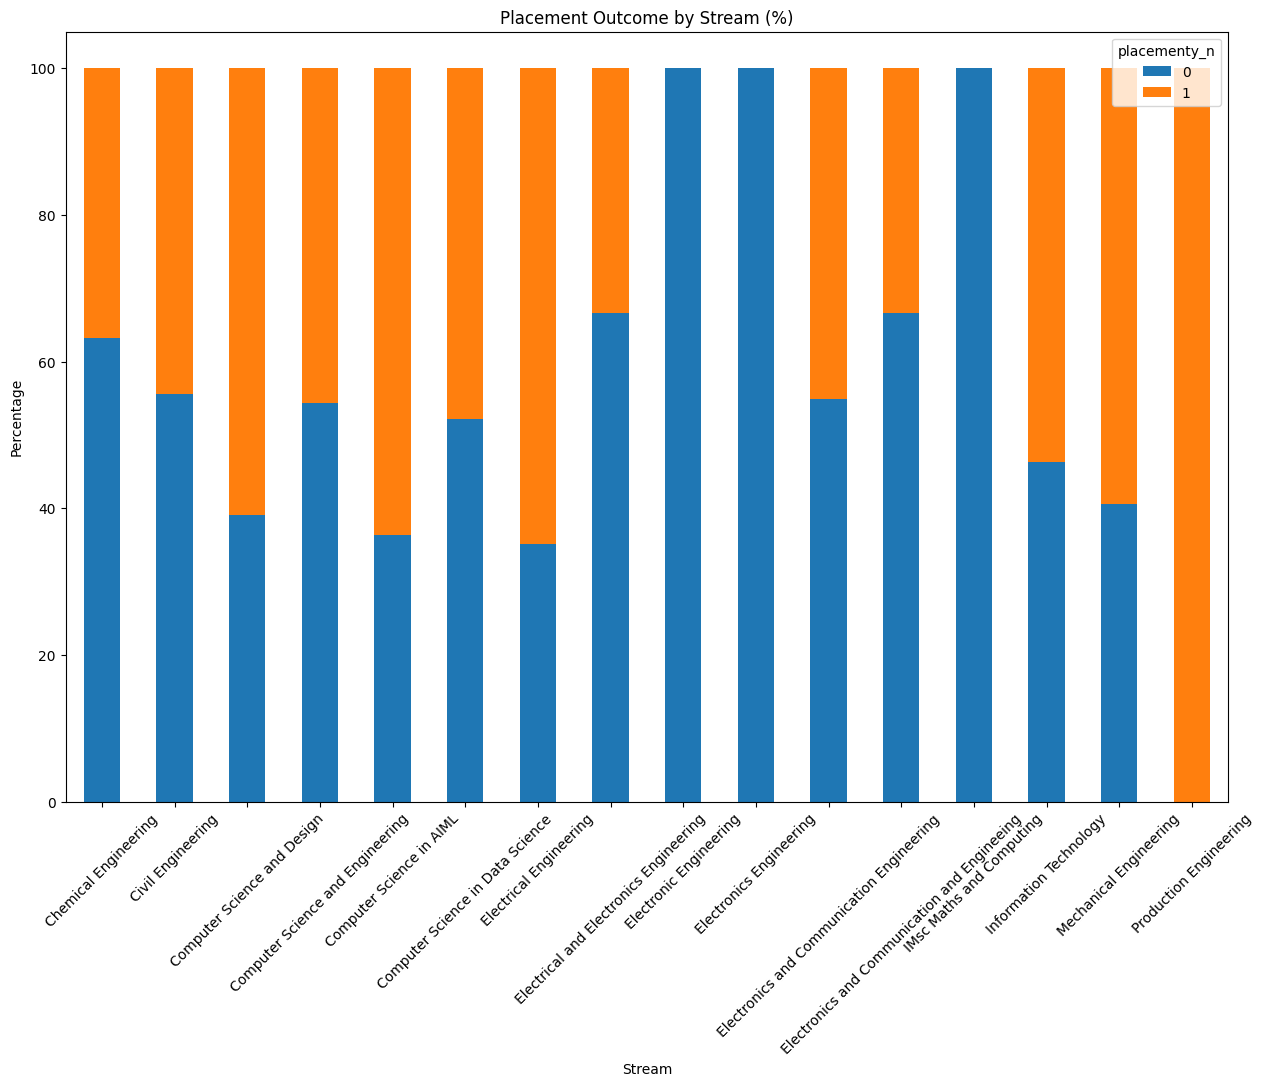

In [42]:
stream_placement = pd.crosstab(df["stream"], df["placementy_n"], normalize="index") * 100
stream_placement.plot(kind="bar", stacked=True, figsize=(15,10))

plt.title("Placement Outcome by Stream (%)")
plt.xlabel("Stream")
plt.ylabel("Percentage")
plt.xticks(rotation=45)

save_plot("placement_vs_stream.png")


## CGPA Distribution by Placement Outcome

We compare CGPA distributions for placed and non-placed students
to observe academic performance differences.


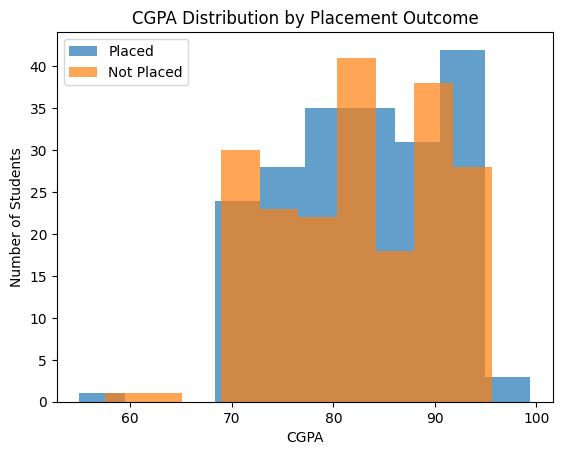

In [43]:
plt.hist(df[df["placementy_n"] == 1]["cgpa_normalized"], bins=10, alpha=0.7, label="Placed")
plt.hist(df[df["placementy_n"] == 0]["cgpa_normalized"], bins=10, alpha=0.7, label="Not Placed")

plt.title("CGPA Distribution by Placement Outcome")
plt.xlabel("CGPA")
plt.ylabel("Number of Students")
plt.legend()

save_plot("placement_vs_cgpa.png")


## Placement Outcome vs Internship Experience

Internships are commonly believed to improve placement chances.
This analysis compares placement outcomes accordingly.


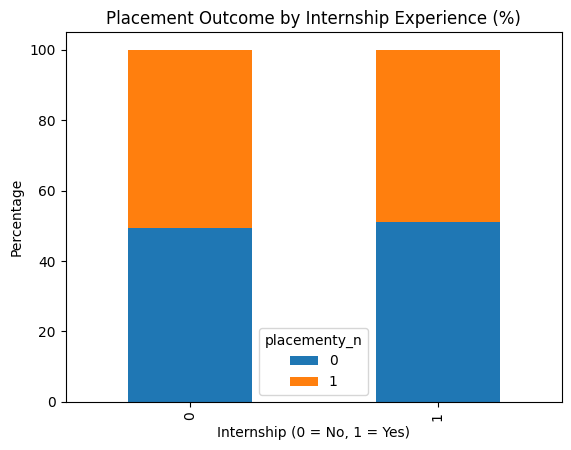

In [44]:
internship_placement = pd.crosstab(df["internshipsy_n"], df["placementy_n"], normalize="index") * 100
internship_placement.plot(kind="bar", stacked=True)

plt.title("Placement Outcome by Internship Experience (%)")
plt.xlabel("Internship (0 = No, 1 = Yes)")
plt.ylabel("Percentage")

save_plot("placement_vs_internship.png")


## Placement Outcome vs Training Programs

Training programs may reflect skill development beyond academics.


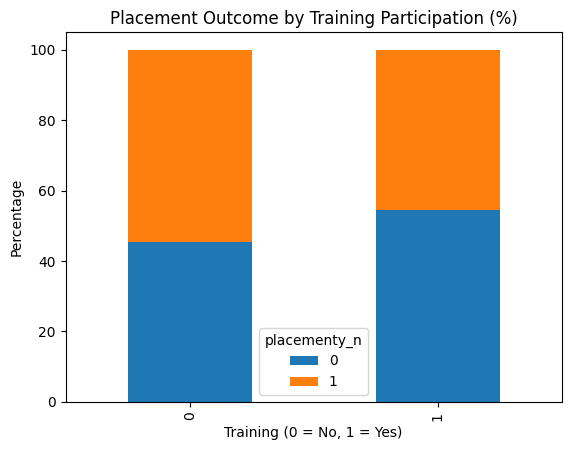

In [45]:
training_placement = pd.crosstab(df["trainingy_n"], df["placementy_n"], normalize="index") * 100
training_placement.plot(kind="bar", stacked=True)

plt.title("Placement Outcome by Training Participation (%)")
plt.xlabel("Training (0 = No, 1 = Yes)")
plt.ylabel("Percentage")

save_plot("placement_vs_training.png")


## Communication Level and Placement Outcome

Communication skills are often critical in interviews.
We compare placement rates across communication levels.


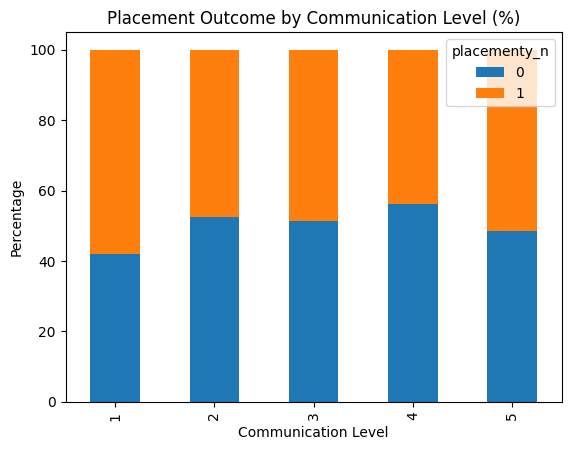

In [46]:
comm_placement = pd.crosstab(df["communication_level"], df["placementy_n"], normalize="index") * 100
comm_placement.plot(kind="bar", stacked=True)

plt.title("Placement Outcome by Communication Level (%)")
plt.xlabel("Communication Level")
plt.ylabel("Percentage")

save_plot("placement_vs_communication.png")


## Backlog History and Placement Outcome

Academic backlogs may negatively influence placement outcomes.


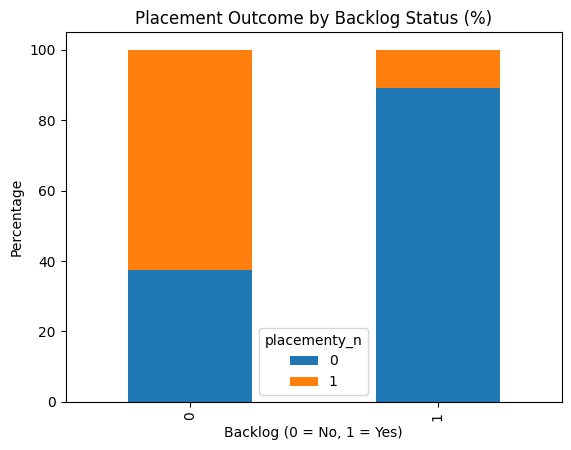

In [47]:
backlog_placement = pd.crosstab(df["backlog_in_5th_sem"], df["placementy_n"], normalize="index") * 100
backlog_placement.plot(kind="bar", stacked=True)

plt.title("Placement Outcome by Backlog Status (%)")
plt.xlabel("Backlog (0 = No, 1 = Yes)")
plt.ylabel("Percentage")

save_plot("placement_vs_backlog.png")


## Combined Effect: Internship Experience and CGPA

We examine CGPA distributions segmented by internship experience
to observe combined patterns.


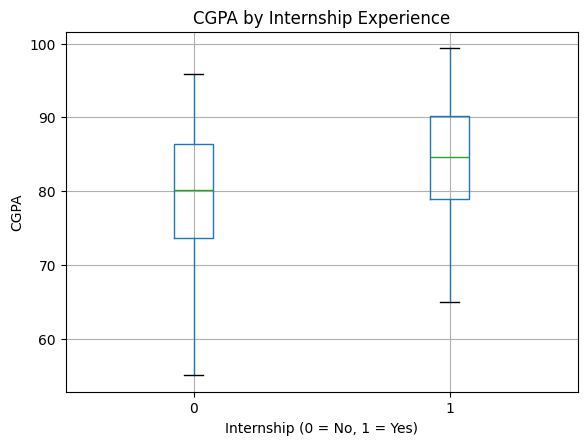

In [48]:
df.boxplot(column="cgpa_normalized", by="internshipsy_n")
plt.title("CGPA by Internship Experience")
plt.suptitle("")
plt.xlabel("Internship (0 = No, 1 = Yes)")
plt.ylabel("CGPA")

save_plot("cgpa_vs_internship.png")


## Key Observations from Bivariate Analysis

- Placement rates vary noticeably across academic streams
- Internship and training participation show higher placement association
- Placed students generally have higher CGPA distributions
- Communication level correlates with better placement outcomes
- Academic backlogs are associated with lower placement rates

These findings are observational and do not imply causality.
Final conclusions and recommendations are presented in the next notebook.
